## Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cleaned_SLU_Opportunity_Wise_Dataset.csv")

In [3]:
df.describe()

,Status Code
count,8246.000000
mean,1052.186515
std,21.665849
min,1010.000000
25%,1030.000000
50%,1050.000000
75%,1070.000000
max,1120.000000


Stacked Bar Chart – Gender vs Opportunity Category

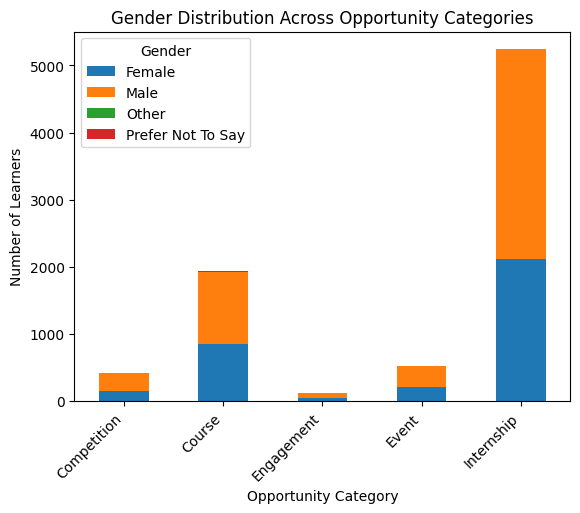

In [4]:
import matplotlib.pyplot as plt

# Prepare data for stacked bar chart
gender_opportunity = (
    df.groupby(['Opportunity Category', 'Gender'])
    .size()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
gender_opportunity.plot(kind='bar', stacked=True)

plt.title('Gender Distribution Across Opportunity Categories')
plt.xlabel('Opportunity Category')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')

plt.show()

boxplot of "Time Taken to Apply" across Opportunity Categories

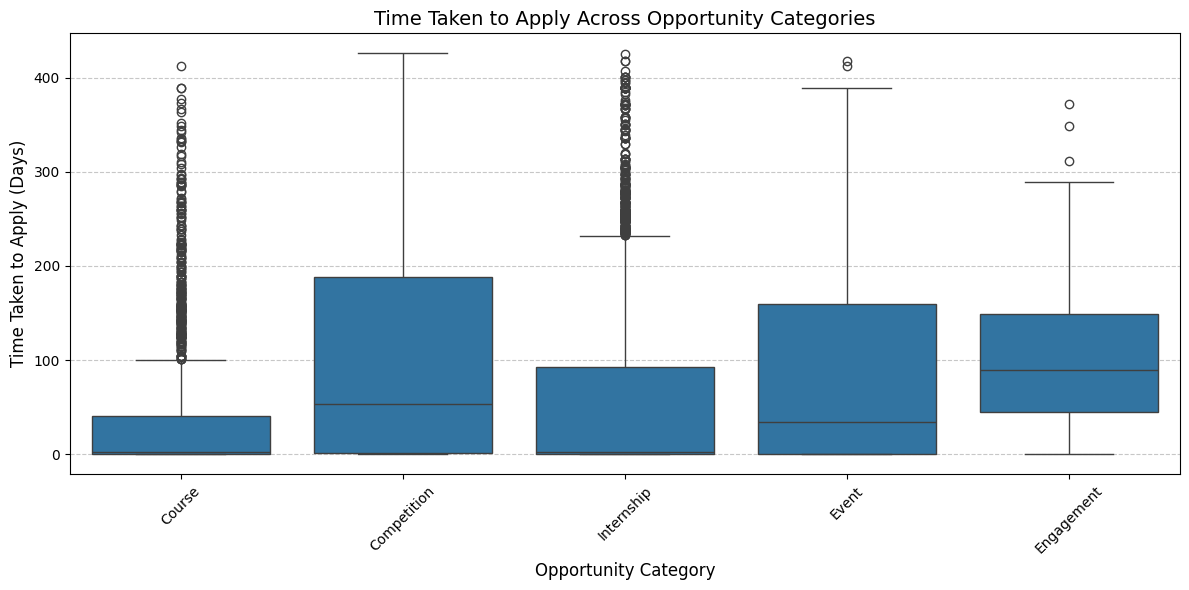

In [5]:
# Ensure date columns are datetime
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')

# Create Time Taken to Apply (in days)
df['Time_Taken_To_Apply_Days'] = (df['Apply Date'] - df['Learner SignUp DateTime']).dt.days

# Remove negative or missing values
time_apply_df = df[df['Time_Taken_To_Apply_Days'] >= 0]

# Boxplot: Time Taken to Apply per Opportunity Category
plt.figure(figsize=(12,6))
sns.boxplot(x='Opportunity Category', y='Time_Taken_To_Apply_Days', data=time_apply_df)
plt.title('Time Taken to Apply Across Opportunity Categories', fontsize=14)
plt.xlabel('Opportunity Category', fontsize=12)
plt.ylabel('Time Taken to Apply (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Line Chart-Learner Enrollment Patterns by Month

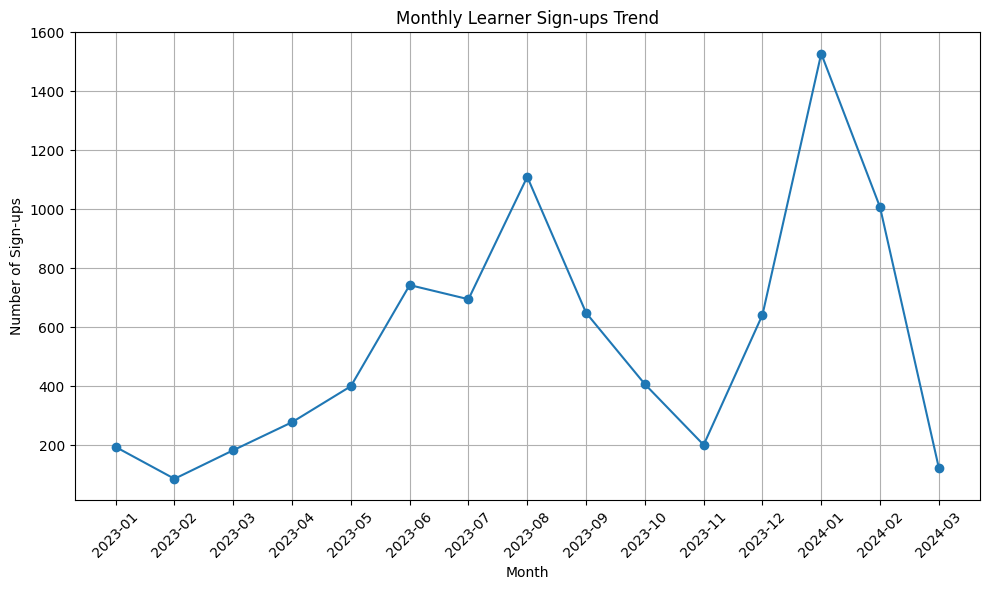

In [6]:
# Ensure 'Learner SignUp DateTime' is datetime
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])

# Aggregate number of sign-ups per month
df['SignUp_Month'] = df['Learner SignUp DateTime'].dt.to_period('M')
monthly_signups = df.groupby('SignUp_Month').size()

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(monthly_signups.index.astype(str), monthly_signups.values, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Learner Sign-ups Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sign-ups')
plt.grid(True)
plt.tight_layout()
plt.show()